In [ ]:
import torch
import pathlib
import random
import transforms as T
import h5py
from torch.utils.data import Dataset
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mri_data import MaskFunc

In [ ]:
fname = "/media/student1/RemovableVolume/calgary_new/singlechannel/Train/e13991s3_P01536.7.npy"
slice = 50
data = np.load(fname)
kspace = data[slice]
plt.imshow(np.log(np.sqrt(kspace[:,:,0]**2 + kspace[:,:,1]*2)+1e-8))

In [ ]:
kspace_cplx = kspace[:,:,0] + 1j*kspace[:,:,1]
kspace_cplx = np.fft.fftshift(kspace_cplx)
kspace_cplx.shape
# plt.imshow(np.log(np.abs(kspace)+1e-8))


In [ ]:
kspace_t = T.to_tensor(kspace_cplx)
plt.imshow(torch.log(torch.sqrt(kspace_t[:,:,0]**2 + kspace_t[:,:,1]**2 + 1e-8)))
plt.colorbar()

In [ ]:
acc_factor = 8
mask_func = MaskFunc([0.08], [acc_factor])
seed =  tuple(map(ord, str(fname)))
kspace_us, mask = T.apply_mask(kspace_t.float(),mask_func,seed)
kspace_us.shape

In [ ]:
kspace_cplx_us = kspace_us[:,:,0].numpy() + 1j*kspace_us[:,:,1].numpy()
plt.imshow(np.log(np.abs(kspace_cplx_us)+1e-8))
plt.colorbar()

In [ ]:
img_cplx_gt = np.fft.ifft2(kspace_cplx)
plt.imshow(np.abs(img_cplx_gt))
plt.colorbar()

In [ ]:
img_cplx_us = np.fft.ifft2(kspace_cplx_us)

maxi = (np.abs(img_cplx_us)).max()

plt.imshow(np.abs(img_cplx_us))
plt.colorbar()

In [ ]:
ksp_us_np = np.fft.fft2(img_cplx_us)
plt.imshow(np.log(np.abs(ksp_us_np)+1e-8))
plt.colorbar()

In [ ]:
ksp_gt_np = np.fft.fft2(img_cplx_gt)
plt.imshow(np.log(np.abs(ksp_gt_np)+1e-8))
plt.colorbar()

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(np.abs(img_cplx_us)/maxi)
plt.colorbar()
fig.add_subplot(1, 2,2 )
plt.imshow(np.abs(img_cplx_gt)/maxi)
plt.colorbar()

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(torch.sqrt(kspace_t[:,:,0]**2+kspace_t[:,:,1]**2)/(10000*maxi))
plt.colorbar()
fig.add_subplot(1, 2,2 )
plt.imshow(torch.sqrt(kspace_us[:,:,0]**2+kspace_us[:,:,1]**2)/(10000*maxi))
plt.colorbar()

# Dataloader check

In [1]:
import torch
import pathlib
import random
import transforms as T
import h5py
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mri_data import MaskFunc

from pathlib import Path

In [ ]:
fname = "/media/student1/RemovableVolume/calgary_new/singlechannel/Train/e14427s3_P76288.7.npy"
slice = 80
data = np.load(fname)
kspace = data[slice]
plt.imshow(np.log(np.sqrt(kspace[:,:,0]**2 + kspace[:,:,1]*2)+1e-8))

In [ ]:
kspace_cplx = kspace[:,:,0] + 1j*kspace[:,:,1]
plt.imshow(np.log(np.abs(kspace_cplx)+1e-8))
plt.colorbar()

In [ ]:
kspace_np_gt = np.fft.fftshift(kspace_cplx)
plt.imshow(np.log(np.abs(kspace_np_gt)+1e-8))
plt.colorbar()

In [ ]:
kspace_t_gt = T.to_tensor(kspace_np_gt)
mask_func = MaskFunc([0.08], [8])
seed =  tuple(map(ord, str(fname)))
kspace_t_us, mask = T.apply_mask(kspace_t_gt.float(),mask_func,seed)
# kspace_np_us = kspace_t_us[:,:,0].numpy() + 1j*kspace_t_us[:,:,1].numpy()

plt.imshow(torch.log(torch.sqrt(kspace_t_us[:,:,0]**2 + kspace_t_us[:,:,1]**2)+1e-8))
plt.colorbar()

In [ ]:
img_t_us = T.ifft2(kspace_t_us)
plt.imshow(torch.sqrt(img_t_us[:,:,0]**2 + img_t_us[:,:,1]**2))
plt.colorbar()

In [ ]:
img_t_us_abs =  T.complex_abs(img_t_us)
img_t_gt =  (T.ifft2(kspace_t_gt))

In [ ]:
maxi = img_t_us_abs.max()

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(T.complex_abs(img_t_us)/maxi)
plt.colorbar()
fig.add_subplot(1, 2,2 )
plt.imshow(T.complex_abs(img_t_gt)/maxi)
plt.colorbar()

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(torch.sqrt(kspace_t_gt[:,:,0]**2+kspace_t_gt[:,:,1]**2)/(maxi))
plt.colorbar()
fig.add_subplot(1, 2,2 )
plt.imshow(torch.sqrt(kspace_t_us[:,:,0]**2+kspace_t_us[:,:,1]**2)/(maxi))
plt.colorbar()

In [2]:
from collections import namedtuple
from train_dualencoder_scratch import create_data_loaders
from tqdm import tqdm
from torch.nn import functional as F

In [3]:
args = {'center_fractions':[0.08],'accelerations':[8],'challenge':'singlecoil',
       'train_path':Path('/media/student1/RemovableVolume/calgary_new/singlechannel/Train/'),
       'validation_path':Path('/media/student1/RemovableVolume/calgary_new/singlechannel/Val/'),
       'resolution':320,
       'sample_rate':0.1,
       'batch_size':1,
        'acceleration_factor':8,
        'dataset_type':'calgary',
        'sample':1,
        'device':'cuda',
        'data_parallel':False,
        'num_chans':32,
        'num_pools':4,
        'drop_prob':0
       }
# d_named = namedtuple("Employee", d.keys())(*d.values())
argsobj = namedtuple('args',args.keys())(*args.values())

In [4]:
train_loader, dev_loader, display_loader = create_data_loaders(argsobj)
len(train_loader.dataset)

130

In [5]:
for ksp_gt, ksp,img, tgt,maxi in (train_loader):
    print(ksp.shape,img.shape,tgt.shape)
    break

torch.Size([1, 256, 256, 2]) torch.Size([1, 256, 256]) torch.Size([1, 256, 256])


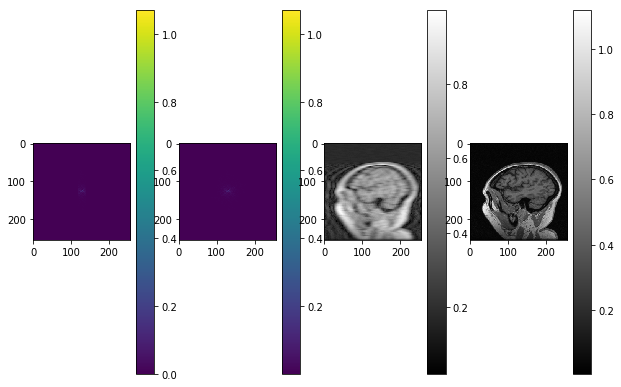

In [6]:
ksp = ksp
batch = 0
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 4, 1)
plt.imshow(torch.sqrt(ksp[batch,:,:,0]**2+ksp[batch,:,:,1]**2))
plt.colorbar()
fig.add_subplot(1, 4, 2)
plt.imshow(torch.sqrt(ksp_gt[batch,:,:,0]**2+ksp_gt[batch,:,:,1]**2))
plt.colorbar()
fig.add_subplot(1, 4,3)
plt.imshow(torch.sqrt(img[batch,:,:]),cmap='gray')
plt.colorbar()
fig.add_subplot(1, 4,4)
plt.imshow(tgt[batch,:,:],cmap='gray')
plt.colorbar()

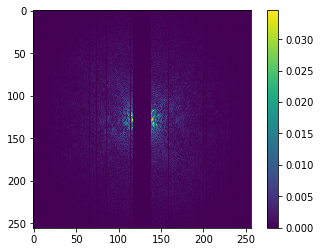

In [8]:
err_ksp = torch.abs(ksp_gt.float()-ksp.float())
plt.imshow(torch.sqrt(err_ksp[batch,:,:,0]**2+err_ksp[batch,:,:,1]**2))
plt.colorbar()

In [ ]:
# from train_wnet_scratch import build_model
from models import UnetModel
def build_unet(args):
    # print("device",args.device)
    model = UnetModel(
        in_chans=2,
        out_chans=2,
        chans=args.num_chans,
        num_pool_layers=args.num_pools,
        drop_prob=args.drop_prob
    ).to(args.device)
    
    return model

model = build_unet(argsobj)
optimizer = torch.optim.Adam(model.parameters(), 0.0001, weight_decay=0)
model

In [ ]:
img = img.cuda().float()

tgt = tgt.unsqueeze(1).cuda().float()
ksp = ksp.permute(0,3,1,2).cuda().float()
maxi = maxi.cuda().float()

In [ ]:
losses=[]
epochs=5000
for i in tqdm(range(epochs)):
#     print("ksp=,ksp_pred=",ksp.shape)
    ksp_pred = model(ksp)
#     print("ksp_pred=",ksp_pred.shape)
    img_pred = T.complex_abs(T.ifft2(ksp_pred.permute(0,2,3,1))).unsqueeze(1)
    loss = F.mse_loss(img_pred,tgt)
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

In [ ]:
plt.plot(losses)

In [ ]:
plt.imshow(out[0,0,:,:].detach().cpu())
plt.colorbar()

In [ ]:
plt.imshow(torch.sqrt(ksp_pred[0,0,:,:].detach().cpu()**2 + ksp_pred[0,1,:,:].detach().cpu()**2))
plt.colorbar()

In [ ]:
plt.imshow(torch.log(torch.sqrt(ksp_pred[0,0,:,:].detach().cpu()**2 + ksp_pred[0,1,:,:].detach().cpu()**2)+1e-8))
plt.colorbar()

In [ ]:
plt.imshow(img_pred[0,0,:,:].detach().cpu())
plt.colorbar()

In [ ]:

img_gt = T.ifft2(kspace_t)
plt.imshow(torch.sqrt(img_gt[:,:,0]**2 + img_gt[:,:,1]**2))
plt.colorbar()

In [ ]:
ksp = T.fft2(img_gt)
plt.imshow(torch.log(torch.sqrt(ksp[:,:,0]**2 + ksp[:,:,1]**2 + 1e-8)))
plt.colorbar()

In [ ]:

img_gt = T.ifft2(ksp)

# img_gt = torch.ifft(kspace_t, 2, normalized=True)
plt.imshow(torch.sqrt(img_gt[:,:,0]**2 + img_gt[:,:,1]**2))
plt.colorbar()

In [ ]:
img_gt_abs = T.complex_abs(img_gt)
plt.imshow(img_gt_abs)
plt.colorbar()

In [ ]:
plt.imshow(torch.log(torch.sqrt(kspace_us[:,:,0]**2 + kspace_us[:,:,1]**2 + 1e-8)))
plt.colorbar()

In [ ]:
img_us = T.ifft2(kspace_us)
img_us_abs = T.complex_abs(img_us)

# img_gt = torch.ifft(kspace_t, 2, normalized=True)
plt.imshow(img_us_abs)
plt.colorbar()


In [ ]:
ksp_us = T.fft2(img_us)
plt.imshow(torch.log(torch.sqrt(ksp_us[:,:,0]**2 + ksp_us[:,:,1]**2 + 1e-8)))
plt.colorbar()

In [ ]:
img_us = T.ifft2(ksp_us)
img_us_abs = T.complex_abs(img_us)

# img_gt = torch.ifft(kspace_t, 2, normalized=True)
plt.imshow(img_us_abs)
plt.colorbar()

In [ ]:
img_us_abs = T.complex_abs(img_us)
plt.imshow(img_us_abs)
plt.colorbar()

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img_us_abs/img_us_abs.max())
plt.colorbar()
fig.add_subplot(1, 2,2 )
plt.imshow(img_gt_abs/img_us_abs.max())
plt.colorbar()


In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow((torch.log(torch.sqrt(kspace_us[:,:,0]**2 + kspace_us[:,:,1]**2 + 1e-8)))/img_us_abs.max()*100000)
plt.colorbar()
fig.add_subplot(1, 2,2 )
plt.imshow((torch.log(torch.sqrt(kspace_t[:,:,0]**2 + kspace_t[:,:,1]**2 + 1e-8)))/img_us_abs.max()*100000)
plt.colorbar()


# submission check

In [ ]:
import numpy as np
import transforms as T
import matplotlib.pyplot as plt

In [ ]:
recons_file = '/media/student1/RemovableVolume/singlechannel_calgary_submission/acc_4x/scratch/25_volumes/e14155s3_P69120.7.npy'
recons = np.load(recons_file,allow_pickle=True)
recons.shape

In [ ]:
target_file = '/media/student1/RemovableVolume/calgary_new/singlechannel/Test2/e14155s3_P69120.7.npy'
data = np.load(target_file)
num_slices =  data.shape[0]
print("num_slice",num_slices)
kspace = data[20:num_slices-20,:,:]

kspace_cplx = kspace[:,:,:,0] + 1j*kspace[:,:,:,1]
kspace_cplx = np.fft.fftshift(kspace_cplx,axes=(1,2))
kspace_t = T.to_tensor(kspace_cplx)

target_abs = T.complex_abs(T.ifft2(kspace_t)).float().numpy()
print("target=",target_abs.shape)

In [ ]:
slice=0
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(recons[slice,:,:])
plt.colorbar()
fig.add_subplot(1, 2,2 )
plt.imshow(target_abs[slice,:,:])
plt.colorbar()

In [ ]:
data.shape

In [ ]:
target_file = '/media/student1/RemovableVolume/calgary_new/singlechannel/Test2/e14155s3_P69120.7.npy'
data = np.load(target_file)
num_slices =  data.shape[0]
print("num_slice",num_slices)
kspace = data[slice]

kspace_cplx = kspace[:,:,0] + 1j*kspace[:,:,1]
kspace_cplx = np.fft.fftshift(kspace_cplx)
kspace_t = T.to_tensor(kspace_cplx)

target_abs = T.complex_abs(T.ifft2(kspace_t)).float().numpy()
print("target=",target_abs.shape)

In [ ]:
plt.imshow(target_abs)